In [1]:
%matplotlib inline
import numpy as np
import quantfin as qf
import matplotlib.pyplot as plt

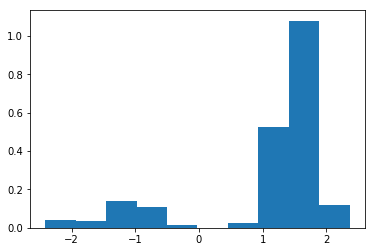

In [2]:
# Sample data from a mixed Gaussian distribution
N = 250
x = qf.random.dists.mixed_gaussian(1.5, 0.25, -1.0, 0.5, 0.8, shape=(N,))
plt.hist(x, density=True);

In [3]:
# Fit a mixed Gaussian distribution to the data
mus, sigmas, rs = qf.stats.fit_mixed_gaussian(x, 2, epsilon=1e-5)

In [4]:
from quantfin.stats.kernels import gaussian
def pdf(x, mus, sigmas, rs):
    N = np.sqrt(2 * np.pi) # Normalisation const.
    p = (rs * gaussian((x - mus) / sigmas)).sum()
    return p / N

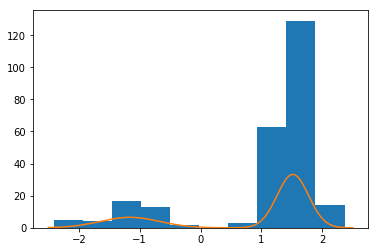

In [7]:
# Plot the fitted distribution over the random data
ts = np.linspace(-2.5, 2.5, 250)
y = np.array([pdf(t, mus, sigmas, rs) for t in ts])
plt.hist(x)
plt.plot(ts, y*N);

In [6]:
# Errors in estimated parameters
print(mus - [1.5, -1.0])
print(sigmas - [0.25, 0.5])
print(rs - [0.8, 0.2])

[ 0.01501556 -0.16035929]
[ 0.00827791 -0.00928077]
[ 0.03597858 -0.03597858]
